## 1. Overview, Description of Problem

Predict whether a customer continues with their account or closes it. 

Performance metric is the area under the ROC curve between predicted probability and observed target. 

For each id in the test set, you must predict the probability of the target value "Exited". 

Citation:
Walter Reade, Ashley Chow. (2024). Binary Classification with a Bank Churn Dataset . Kaggle. https://kaggle.com/competitions/playground-series-s4e1

## 2. Import the Data

Import libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 3. Explore the Data

In [5]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
#Name of Columns
train_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#Types
train_df.dtypes

int_types = ['id', 'CustomerId', 'CreditScore', 'Tenure', 'NumOfProducts', 'Exited']
target = train_df['Exited']
cat_types = ['Surname', 'Geography', 'Gender']
float_types = ['Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [8]:
#Missing Values
train_df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Visualize Data

In [9]:
target.value_counts() 
#O = No 1 = Yes

Exited
0    130113
1     34921
Name: count, dtype: int64

In [10]:
train_df[int_types].describe()

,id,CustomerId,CreditScore,Tenure,NumOfProducts,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,5.020353,1.554455,0.211599
std,47641.3565,7.139782e+04,80.103340,2.806159,0.547154,0.408443
min,0.0000,1.556570e+07,350.000000,0.000000,1.000000,0.000000
25%,41258.2500,1.563314e+07,597.000000,3.000000,1.000000,0.000000
50%,82516.5000,1.569017e+07,659.000000,5.000000,2.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,7.000000,2.000000,0.000000
max,165033.0000,1.581569e+07,850.000000,10.000000,4.000000,1.000000


ID and CustomerID don't really provide any information.

Credit Scores - Between 350 to 850, with the average around 656 (median 659), which with minimal knowledge seems normal. 

NumOfProducts - 1 to 4, with an average of 2 (bc you can't have 1.5 products?) - Median 2. 

Exited is the target and is yes or no (1 or 0)

In [11]:
train_df[float_types].describe()

,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,38.125888,55478.086689,0.753954,0.497770,112574.822734
std,8.867205,62817.663278,0.430707,0.499997,50292.865585
min,18.000000,0.000000,0.000000,0.000000,11.580000
25%,32.000000,0.000000,1.000000,0.000000,74637.570000
50%,37.000000,0.000000,1.000000,0.000000,117948.000000
75%,42.000000,119939.517500,1.000000,1.000000,155152.467500
max,92.000000,250898.090000,1.000000,1.000000,199992.480000


Age - 18 to 92, with the average of 38 years old, median around 37. 

Balance - 0 to 250,898  with average of 55,478 and a median of 0 -- Maybe check into this. 

HasCrCard, IsActiveMember - yes or No.

EstimatedSalary - 11$ to 199,992. Avg: 112,572 Med: 117,948

In [12]:
train_df['Balance'].value_counts().sort_values()

Balance
62321.36         1
84483.05         1
122723.67        1
121323.19        1
118711.57        1
             ...  
129855.32       59
122314.50       63
127864.40       64
124577.33       88
0.00         89648
Name: count, Length: 30075, dtype: int64

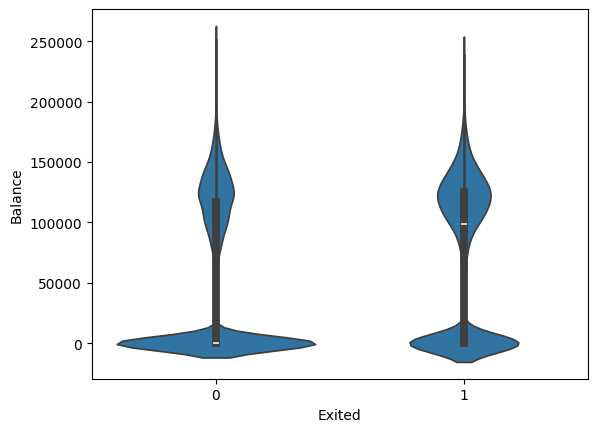

In [13]:
#Balance versus Exited
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x='Exited', y='Balance', data=train_df)
plt.show()

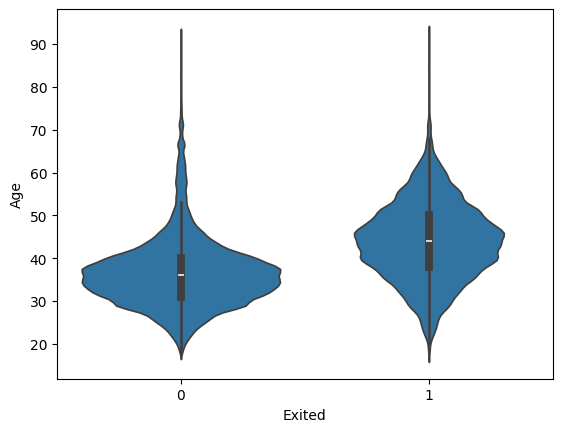

In [14]:
#Age vs. Exited
sns.violinplot(x='Exited', y='Age', data=train_df)
plt.show()

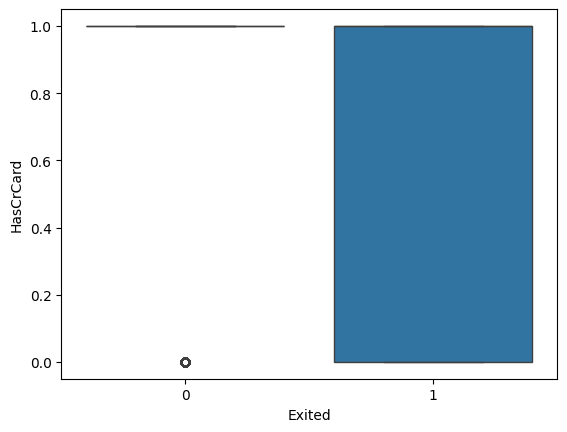

In [15]:
#Credit Card vs. Exited

